In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import random

import geopandas as gpd
import numpy as np
from shapely.geometry import Point,Polygon

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

from ipywidgets import widgets
from ipywidgets import interact, interact_manual


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


### Data exploration of census data

In [2]:
census=pd.read_csv("./neighbourhoods/neighbourhood-profiles-2016-csv.csv")
census.shape

(2383, 146)

In [3]:
print(census.columns)

Index(['_id', 'Category', 'Topic', 'Data Source', 'Characteristic',
       'City of Toronto', 'Agincourt North', 'Agincourt South-Malvern West',
       'Alderwood', 'Annex',
       ...
       'Willowdale West', 'Willowridge-Martingrove-Richview', 'Woburn',
       'Woodbine Corridor', 'Woodbine-Lumsden', 'Wychwood', 'Yonge-Eglinton',
       'Yonge-St.Clair', 'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=146)


In [4]:
census.head(2)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

**Explore the different values in the category column !**

In [5]:
census['Category'].value_counts()

Language                                   808
Income                                     311
Language of work                           280
Ethnic origin                              279
Education                                  182
Immigration and citizenship                154
Labour                                      76
Housing                                     74
Families, households and marital status     70
Population                                  55
Aboriginal peoples                          34
Journey to work                             25
Mobility                                    18
Visible minority                            15
Neighbourhood Information                    2
Name: Category, dtype: int64

**Explore the different values in the Topics column !**

In [6]:
census['Topic'].value_counts()

Ethnic origin population                                                                            279
Language spoken most often at home                                                                  269
Language used most often at work                                                                    269
Knowledge of languages                                                                              263
Mother tongue                                                                                       253
Major field of study - Classification of Instructional Programs (CIP) 2016                          124
Income sources                                                                                       94
Income of individuals in 2015                                                                        80
Recent immigrants by selected place of birth                                                         61
Immigrants by selected place of birth                           

In [6]:
len(census['Characteristic'].unique())

1651

In [7]:
census['Characteristic'].unique()[0:10]

array(['Neighbourhood Number', 'TSNS2020 Designation', 'Population, 2016',
       'Population, 2011', 'Population Change 2011-2016',
       'Total private dwellings',
       'Private dwellings occupied by usual residents',
       'Population density per square kilometre',
       'Land area in square kilometres', 'Children (0-14 years)'],
      dtype=object)

## Selection of features in the 'Characteristic' column

Features traditionally important for customer segementation are selected manually to avoid redudancy. The choosen categories are 

1. Population
2. Income
3. marital status
4. household type
5. education
6. ethinicity
7. immigrant status

In [8]:
population_index=[4,7,17,31,18,39,19,40,20,41,21,42,22,43,23,44,24,45,
            25,46,26,47,27,48,28,49,29,50,30,51,32,52,33,53,34,54,35,55]
income_index=[1055,1056,1057,1058,1059,1060,1061,1062,1063,
             1064,1065,1066,1067,1068,1069,1071,1072,1073]
marital_index=[76,80,81,82,83]
household_index=[58,59,61,62,63,64,68,69,70,71,72]
education_index=[1715,1716,1718,1722,1723,1725,1726,1727,1720,1728]
ethnic_index=[1350,1354,1366,1374,1379,1390,1397,1414,1435,1399,1458,1483,
                   1551,1582,1598,1619]
immigrant_index=[1151,1152,1153,1154,1156,1157,1160,1161]

### confirm the selected categories

In [9]:
print(census['Characteristic'].loc[population_index+income_index+marital_index+household_index+education_index+ethnic_index+immigrant_index].tolist())

['Population Change 2011-2016', 'Population density per square kilometre', 'Male: 10 to 14 years', 'Female: 10 to 14 years', 'Male: 15 to 19 years', 'Female: 15 to 19 years', 'Male: 20 to 24 years', 'Female: 20 to 24 years', 'Male: 25 to 29 years', 'Female: 25 to 29 years', 'Male: 30 to 34 years', 'Female: 30 to 34 years', 'Male: 35 to 39 years', 'Female: 35 to 39 years', 'Male: 40 to 44 years', 'Female: 40 to 44 years', 'Male: 45 to 49 years', 'Female: 45 to 49 years', 'Male: 50 to 54 years', 'Female: 50 to 54 years', 'Male: 55 to 59 years', 'Female: 55 to 59 years', 'Male: 60 to 64 years', 'Female: 60 to 64 years', 'Male: 65 to 69 years', 'Female: 65 to 69 years', 'Male: 70 to 74 years', 'Female: 70 to 74 years', 'Male: 75 to 79 years', 'Female: 75 to 79 years', 'Male: 80 to 84 years', 'Female: 80 to 84 years', 'Male: 85 to 89 years', 'Female: 85 to 89 years', 'Male: 90 to 94 years', 'Female: 90 to 94 years', 'Male: 95 to 99 years', 'Female: 95 to 99 years', '  Under $5,000', '  $5,0

### Filter the data based on the selected features

In [10]:
census_sel=census.loc[population_index+education_index+marital_index+household_index+income_index+
          immigrant_index+ethnic_index].iloc[:,4:]
census_sel.index=census_sel['Characteristic']
census_sel.drop(labels=['Characteristic','City of Toronto'],axis=1,inplace=True)
census_sel.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Population Change 2011-2016,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,-2.80%,0.20%,1.40%,7.50%,2.00%,-1.50%,-0.50%,-0.30%,6.30%,-0.60%,-0.20%,-3.20%,1.10%,4.60%,2.10%,10.60%,8.90%,12.70%,1.50%,2.80%,2.40%,2.80%,1.20%,2.60%,5.80%,1.10%,2.90%,2.60%,4.00%,-0.20%,-1.00%,1.30%,-1.20%,8.40%,-1.10%,2.70%,-1.80%,-2.90%,2.40%,1.00%,38.70%,4.10%,10.10%,-4.60%,-4.10%,3.40%,-0.90%,-1.90%,1.80%,4.20%,15.40%,2.40%,3.90%,0.40%,-3.00%,1.30%,1.10%,0.80%,-2.10%,10.40%,0.50%,0.70%,-1.10%,29.10%,4.70%,-2.90%,-0.80%,1.10%,-2.20%,28.00%,-0.80%,25.80%,3.40%,0.50%,5.00%,3.70%,5.20%,-2.00%,3.40%,46.60%,-2.30%,4.40%,2.60%,0.70%,2.00%,1.30%,0.60%,0.50%,23.10%,2.00%,-2.00%,-1.30%,8.00%,0.40%,-0.10%,-0.50%,1.40%,1.30%,4.50%,-0.10%,0.70%,2.80%,8.70%,-0.80%,-1.60%,1.50%,0.20%,0.60%,2.10%,2.20%,9.80%,-1.50%,-2.20%,1.90%,52.00%,3.20%,-2.30%,3.30%,-1.00%,-7.60%,3.30%,12.00%,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
Population density per square kilometre,"3,929","3,034","2,435","10,863","2,775","3,377","14,097","4,195","3,240","4,209","3,614","4,011","3,765","6,282","8,134","7,791","1,040","6,764","5,045","8,335","6,464","5,683","2,479","23,044","3,632","3,979","2,273","7,478","8,554","7,881","6,441","4,146","9,819","2,337","8,540","8,038","2,840","7,051","3,306","6,466","2,171","6,582","9,026","8,054","4,380","5,864","8,582","2,673","6,047","11,726","4,893","

In [13]:
census_sel.shape

(106, 140)

### Invert the dataframe to make neighbourhoods as samples

In [13]:
neighbourhood=census_sel.T.copy()
neighbourhood.columns.name=None
neighbourhood.head()

,Population Change 2011-2016,Population density per square kilometre,Male: 10 to 14 years,Female: 10 to 14 years,Male: 15 to 19 years,Female: 15 to 19 years,Male: 20 to 24 years,Female: 20 to 24 years,Male: 25 to 29 years,Female: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Male: 35 to 39 years,Female: 35 to 39 years,Male: 40 to 44 years,Female: 40 to 44 years,Male: 45 to 49 years,Female: 45 to 49 years,Male: 50 to 54 years,Female: 50 to 54 years,Male: 55 to 59 years,Female: 55 to 59 years,Male: 60 to 64 years,Female: 60 to 64 years,Male: 65 to 69 years,Female: 65 to 69 years,Male: 70 to 74 years,Female: 70 to 74 years,Male: 75 to 79 years,Female: 75 to 79 years,Male: 80 to 84 years,Female: 80 to 84 years,Male: 85 to 89 years,Female: 85 to 89 years,Male: 90 to 94 years,Female: 90 to 94 years,Male: 95 to 99 years,Female: 95 to 99 years,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Master's degree,Earned doctorate,Married or living common law,Never married,Separated,Divorced,Widowed,Single-detached house,Apartment in a building that has five or more storeys,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has fewer than five storeys,1 person,2 persons,3 persons,4 persons,5 or more persons,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999",Non-immigrants,Immigrants,Before 1981,1981 to 1990,1991 to 2000,2001 to 2010,2011 to 2016,Non-permanent residents,North American Aboriginal origins,Other North American origins,British Isles origins,French origins,Western European origins (except French origins),Northern European origins (except British Isles origins),Eastern European origins,Southern European origins,Jewish,Caribbean origins,Latin; Central and South American origins,African origins,West Central Asian and Middle Eastern origins,South Asian origins,East and Southeast Asian origins,Oceania origins
Agincourt North,-3.90%,"3,929",660,595,840,865,1015,975,1015,1005,835,935,680,775,760,910,890,1060,1160,1290,1060,1165,925,1070,925,985,590,690,490,575,380,485,210,350,100,160,25,60,3335,4240,520,2550,570,3090,215,105,735,85,14200,7355,570,1460,1690,3345,2120,805,1440,645,735,1350,2370,1995,1750,1645,150,105,165,450,340,565,450,510,455,475,930,755,695,640,500,935,465,510,"7,895","19,995","3,450","3,250","5,595","5,535","2,165",930,40,"1,345","1,500",265,350,80,265,"1,215",0,"1,445",470,535,475,"5,260","18,575",10
Agincourt South-Malvern West,8.00%,"3,034",460,475,780,690,1000,895,1045,975,820,835,625,715,610,745,760,885,970,975,850,915,710,795,630,690,425,450,350,405,240,350,155,205,45,100,20,20,1860,3410,460,2340,485,3270,215,120,920,85,11205,6605,460,1325,1080,2790,3145,330,515,695,610,1610,2325,1680,1335,1175,320,130,205,275,350,415,395,450,470,445,860,755,630,500,405,700,370,425,"7,190","15,095","2,830","2,255","3,805","4,460","1,735","1,175",105,"1,190","1,750",260,425,95,430,"1,635",20,"1,395",480,625,805,"4,170","13,075",0
Alderwood,1.30%,"2,435",225,255,285,290,355,310,355,350,410,430,455,450,420,445,440,430,515,515,540,485,390,400,300,325,205,210,155,180,105,210,65,130,35,70,10,5,795,1825,445,1735,195,1415,105,45,390,25,5735,3005,270,595,685,2840,255,545,85,330,560,1105,1440,885,795,390,70,35,80,85,160,175,170,210,185,225,390,355,365,310,265,605,445,470,"7,975","3,970","1,715",605,770,685,200,85,305,"2,355",

In [16]:
columns_formatted=[col.strip() for col in neighbourhood.columns]
print(len(columns_formatted))
neighbourhood.columns=columns_formatted

106


### Clean the data & convert to  float

In [18]:
for col in neighbourhood.columns:
    neighbourhood[col] = neighbourhood[col].str.replace('%', '')
    neighbourhood[col] = neighbourhood[col].str.replace(',', '')
    neighbourhood[col] = neighbourhood[col].astype(float)

In [19]:
neighbourhood.head()

,Population Change 2011-2016,Population density per square kilometre,Male: 10 to 14 years,Female: 10 to 14 years,Male: 15 to 19 years,Female: 15 to 19 years,Male: 20 to 24 years,Female: 20 to 24 years,Male: 25 to 29 years,Female: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Male: 35 to 39 years,Female: 35 to 39 years,Male: 40 to 44 years,Female: 40 to 44 years,Male: 45 to 49 years,Female: 45 to 49 years,Male: 50 to 54 years,Female: 50 to 54 years,Male: 55 to 59 years,Female: 55 to 59 years,Male: 60 to 64 years,Female: 60 to 64 years,Male: 65 to 69 years,Female: 65 to 69 years,Male: 70 to 74 years,Female: 70 to 74 years,Male: 75 to 79 years,Female: 75 to 79 years,Male: 80 to 84 years,Female: 80 to 84 years,Male: 85 to 89 years,Female: 85 to 89 years,Male: 90 to 94 years,Female: 90 to 94 years,Male: 95 to 99 years,Female: 95 to 99 years,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Master's degree,Earned doctorate,Married or living common law,Never married,Separated,Divorced,Widowed,Single-detached house,Apartment in a building that has five or more storeys,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has fewer than five storeys,1 person,2 persons,3 persons,4 persons,5 or more persons,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999",Non-immigrants,Immigrants,Before 1981,1981 to 1990,1991 to 2000,2001 to 2010,2011 to 2016,Non-permanent residents,North American Aboriginal origins,Other North American origins,British Isles origins,French origins,Western European origins (except French origins),Northern European origins (except British Isles origins),Eastern European origins,Southern European origins,Jewish,Caribbean origins,Latin; Central and South American origins,African origins,West Central Asian and Middle Eastern origins,South Asian origins,East and Southeast Asian origins,Oceania origins
Agincourt North,-3.9,3929.0,660.0,595.0,840.0,865.0,1015.0,975.0,1015.0,1005.0,835.0,935.0,680.0,775.0,760.0,910.0,890.0,1060.0,1160.0,1290.0,1060.0,1165.0,925.0,1070.0,925.0,985.0,590.0,690.0,490.0,575.0,380.0,485.0,210.0,350.0,100.0,160.0,25.0,60.0,3335.0,4240.0,520.0,2550.0,570.0,3090.0,215.0,105.0,735.0,85.0,14200.0,7355.0,570.0,1460.0,1690.0,3345.0,2120.0,805.0,1440.0,645.0,735.0,1350.0,2370.0,1995.0,1750.0,1645.0,150.0,105.0,165.0,450.0,340.0,565.0,450.0,510.0,455.0,475.0,930.0,755.0,695.0,640.0,500.0,935.0,465.0,510.0,7895.0,19995.0,3450.0,3250.0,5595.0,5535.0,2165.0,930.0,40.0,1345.0,1500.0,265.0,350.0,80.0,265.0,1215.0,0.0,1445.0,470.0,535.0,475.0,5260.0,18575.0,10.0
Agincourt South-Malvern West,8.0,3034.0,460.0,475.0,780.0,690.0,1000.0,895.0,1045.0,975.0,820.0,835.0,625.0,715.0,610.0,745.0,760.0,885.0,970.0,975.0,850.0,915.0,710.0,795.0,630.0,690.0,425.0,450.0,350.0,405.0,240.0,350.0,155.0,205.0,45.0,100.0,20.0,20.0,1860.0,3410.0,460.0,2340.0,485.0,3270.0,215.0,120.0,920.0,85.0,11205.0,6605.0,460.0,1325.0,1080.0,2790.0,3145.0,330.0,515.0,695.0,610.0,1610.0,2325.0,1680.0,1335.0,1175.0,320.0,130.0,205.0,275.0,350.0,415.0,395.0,450.0,470.0,445.0,860.0,755.0,630.0,500.0,405.0,700.0,370.0,425.0,7190.0,15095.0,2830.0,2255.0,3805.0,4460.0,1735.0,1175.0,105.0,1190.0,1750.0,260.0,425.0,95.0,430.0,1635.0,20.0,1395.0,480.0,625.0,805.0,4170.0,13075.0,0.0
Alderwood,1.3,2435.0,225.0,255.0,285.0,290.0,355.0,310.0,355.0,35

## Read the map data

In [21]:
df_toronto=gpd.read_file("./Neighbourhoods.geojson")
df_toronto.shape

(140, 16)

In [22]:
df_toronto=df_toronto.sort_values(by=['AREA_NAME'])
df_toronto.head(2)

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
74,1195,25886428,25926736,49885,129,129,Agincourt North (129),Agincourt North (129),None,None,-79.266712,43.805441,16492689,1.395145e+07,17159.740667,"POLYGON ((-79.24212745783549 43.8024720055488,..."
75,1196,25886449,25926737,49885,128,128,Agincourt South-Malvern West (128),Agincourt South-Malvern West (128),None,None,-79.265612,43.788658,16492705,1.511736e+07,21320.849547,POLYGON ((-79.25497985384374 43.78122253713403...


In [85]:
geometry_points=[Point(xy) for xy in zip(df_toronto['LONGITUDE'],df_toronto['LATITUDE'])]

In [116]:
color_shortlisted=['red','blue','firebrick','orange','olive','deepskyblue','yellowgreen','cyan','magenta','chocolate']

### Create a function to read dictionaries saved from google api search

In [29]:
def dict_to_df(path):
    '''
    Input: path of the dictionary
    output: converted dataframe
    '''
    dictionary=np.load(path,allow_pickle=True).item()
    names=[]
    counts=[]
    for key,val in dictionary.items():
        names.append(key)
        counts.append(len(val['results']))
    df=pd.DataFrame({'name':names,'count':counts})
    df=df.sort_values(by=['name'])
    df.index=neighbourhood.index
    df=df.drop(['name'],axis=1)
    return df


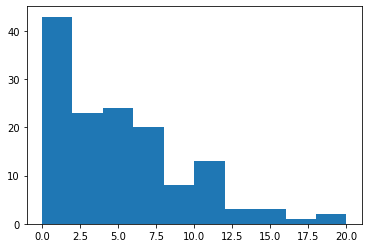

In [32]:
plt.hist(caribbean_df['count'])
plt.show()

In [33]:
caribbean_df['count'].describe()

count    140.000000
mean       4.685714
std        4.247870
min        0.000000
25%        1.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: count, dtype: float64

### Feature selection based on spearman correlation

In [61]:
def col_select(df,column_to_compare,n):
    '''
    Input
    df: dataframe whose columns are being compared:
    col: a column with whose previous dataframe is being compared
    n: number of colums to keep
    output:
    col_df: a dataframe with highly correlated columns & values
    '''
    correlations=[]
    for col in df.columns:
        cor=df[col].corr(column_to_compare,method='spearman')
        correlations.append(cor)
    abs_correlations=[abs(val) for val in correlations]
    col_selected_df=pd.DataFrame({'feature':df.columns,'correlation':correlations,'abs':abs_correlations})
    col_selected_df=col_selected_df.sort_values(by=['abs'],ascending=False)
    col_selected_df=col_selected_df.iloc[0:n,:]
    return col_selected_df

In [65]:
high_corr_df=col_select(neighbourhood,caribbean_df['count'],10)
high_corr_df

,feature,correlation,abs
99,Caribbean origins,0.582508,0.582508
38,"No certificate, diploma or degree",0.548586,0.548586
40,Apprenticeship or trades certificate or diploma,0.493740,0.493740
100,Latin; Central and South American origins,0.476606,0.476606
39,Secondary (high) school diploma or equivalency...,0.475161,0.475161
101,African origins,0.448319,0.448319
85,1981 to 1990,0.424258,0.424258
50,Separated,0.420795,0.420795
70,"$30,000 to $34,999",0.409522,0.409522
49,Never married,0.408567,0.408567


### Perform PCA on the dataframe with selected columns

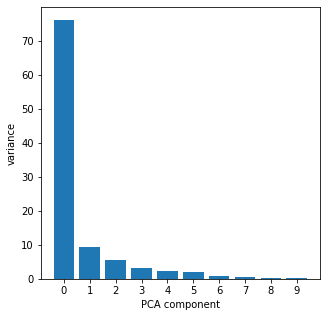

In [69]:
subset=neighbourhood[high_corr_df['feature']]
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)
# Fit the pipeline to 'samples'
pipeline.fit(subset)
pca_components=pipeline.transform(subset)
# Plot the explained variances
features = range(pca_components.shape[1])
explained_var=pca.explained_variance_/sum(pca.explained_variance_)*100
plt.figure(figsize=(5,5))
plt.bar(features,explained_var)
plt.xlabel('PCA component')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [76]:
explained_sum=0
for i in range(1,(len(explained_var)+1)):
    explained_sum=explained_sum+explained_var[i-1]
    if explained_sum>95:
        print(i)
        break
    

5


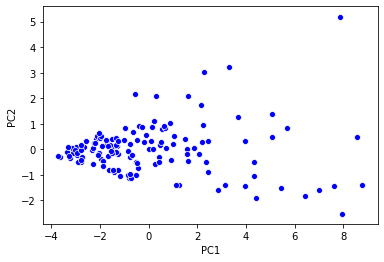

In [70]:
ax=sns.scatterplot(pca_components[:,0],pca_components[:,1],color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

## Do PCA & clustering

In [78]:
pca_components.shape

(140, 10)

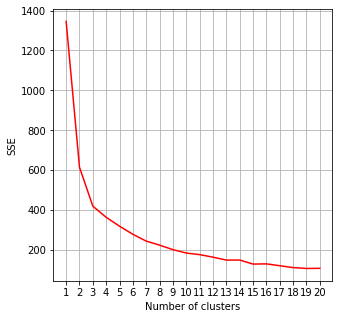

In [106]:
inertias = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(pca_components[:,0:5])
    inertias.append(kmeans.inertia_)
    
ax = plt.figure(figsize=(5, 5))    
ax=sns.lineplot(range(1, 21), inertias,color='red',dashes=True)
ax.grid(True)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('SSE')
ax.set_xticks(np.arange(1, 21, 1))
plt.show()        



In [111]:
diff=abs(np.diff(inertias))
diff

array([7.32616760e+02, 1.95673993e+02, 5.59241140e+01, 4.45861063e+01,
       4.07083000e+01, 3.42759441e+01, 2.02062237e+01, 2.25963304e+01,
       1.71763093e+01, 7.77903199e+00, 1.29254756e+01, 1.46791864e+01,
       3.57282530e-01, 2.03449535e+01, 1.03416031e+00, 9.20995377e+00,
       9.51843411e+00, 4.25029361e+00, 5.59868428e-01])

In [112]:
diff_first=diff[0]
threshold=diff_first*.05
for i in range(1,len(diff)):
    if diff[i]<threshold:
        print(i)
        break

5


In [129]:
def sel_num_clust(pca_components,n_components):
    '''
    This function accepts principal components matrix and number of components to use
    It performs kmeans clustering with different clusters and select the optimum number
    of clusters
    Input:
    pca_components: pca_components after pca transformation
    n_components: n components that explains at least 95% of variation
    
    '''
    inertias = []
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, init='random',n_init=100)
        kmeans.fit(pca_components[:,0:n_components])
        inertias.append(kmeans.inertia_)
    diff=abs(np.diff(inertias))
    diff_first=diff[0]
    threshold=diff_first*.05
    for i in range(1,len(diff)):
        if diff[i]<threshold:
            return i
            break

In [133]:
n_clust=sel_num_clust(pca_components,5)

5

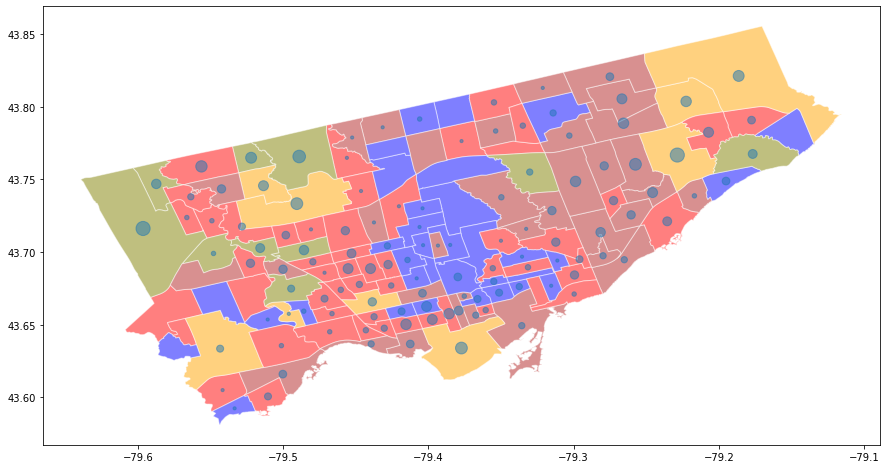

In [117]:
n_clust=5
X=pca_components[:,0:5]
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
rand_colors = color_shortlisted[0:n_clust]
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
geo_carribean=gpd.GeoDataFrame(caribbean_df,geometry=geometry_points)
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_carribean.plot(ax=ax,markersize=geo_carribean['count']*10,alpha=.5)
plt.show()

In [118]:
cluster_labels['color'].value_counts()

red          53
blue         34
firebrick    34
olive        10
orange        9
Name: color, dtype: int64

In [119]:
cluster_labels.head()

,name,label,color
0,Agincourt North,2,firebrick
1,Agincourt South-Malvern West,2,firebrick
2,Alderwood,0,red
3,Annex,2,firebrick
4,Banbury-Don Mills,2,firebrick


In [120]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values

subset_label.groupby('label').median()

,Caribbean origins,"No certificate, diploma or degree",Apprenticeship or trades certificate or diploma,Latin; Central and South American origins,Secondary (high) school diploma or equivalency certificate,African origins,1981 to 1990,Separated,"$30,000 to $34,999",Never married
label,,,,,,,,,,
blue,315.0,252.5,185.0,300.0,997.5,292.5,412.5,232.5,172.5,3147.5
firebrick,1310.0,1490.0,547.5,685.0,2835.0,1302.5,1497.5,620.0,515.0,6685.0
olive,3395.0,2235.0,885.0,1880.0,3642.5,2890.0,1950.0,835.0,510.0,7512.5
orange,3830.0,3490.0,1040.0,2115.0,5390.0,2385.0,3450.0,1180.0,835.0,12370.0
red,645.0,850.0,355.0,640.0,1730.0,640.0,835.0,365.0,285.0,4140.0


In [93]:
subset_label.head()

,Caribbean origins,"No certificate, diploma or degree",Apprenticeship or trades certificate or diploma,Latin; Central and South American origins,Secondary (high) school diploma or equivalency certificate,African origins,1981 to 1990,Separated,"$30,000 to $34,999",Never married,label
Agincourt North,1445.0,3335.0,520.0,470.0,4240.0,535.0,3250.0,570.0,450.0,7355.0,NaN
Agincourt South-Malvern West,1395.0,1860.0,460.0,480.0,3410.0,625.0,2255.0,460.0,395.0,6605.0,NaN
Alderwood,350.0,795.0,445.0,315.0,1825.0,215.0,605.0,270.0,170.0,3005.0,NaN
Annex,750.0,450.0,365.0,765.0,2060.0,1040.0,1015.0,550.0,630.0,12060.0,NaN
Banbury-Don Mills,815.0,610.0,400.0,585.0,2265.0,990.0,1790.0,620.0,500.0,6420.0,NaN


In [121]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values
cluster_df=subset_label.groupby('label').median()
cluster_df

,Caribbean origins,"No certificate, diploma or degree",Apprenticeship or trades certificate or diploma,Latin; Central and South American origins,Secondary (high) school diploma or equivalency certificate,African origins,1981 to 1990,Separated,"$30,000 to $34,999",Never married
label,,,,,,,,,,
blue,315.0,252.5,185.0,300.0,997.5,292.5,412.5,232.5,172.5,3147.5
firebrick,1310.0,1490.0,547.5,685.0,2835.0,1302.5,1497.5,620.0,515.0,6685.0
olive,3395.0,2235.0,885.0,1880.0,3642.5,2890.0,1950.0,835.0,510.0,7512.5
orange,3830.0,3490.0,1040.0,2115.0,5390.0,2385.0,3450.0,1180.0,835.0,12370.0
red,645.0,850.0,355.0,640.0,1730.0,640.0,835.0,365.0,285.0,4140.0


In [96]:
cluster_df.index.unique()

Index(['blue', 'firebrick', 'orange', 'red', 'yellow'], dtype='object', name='label')

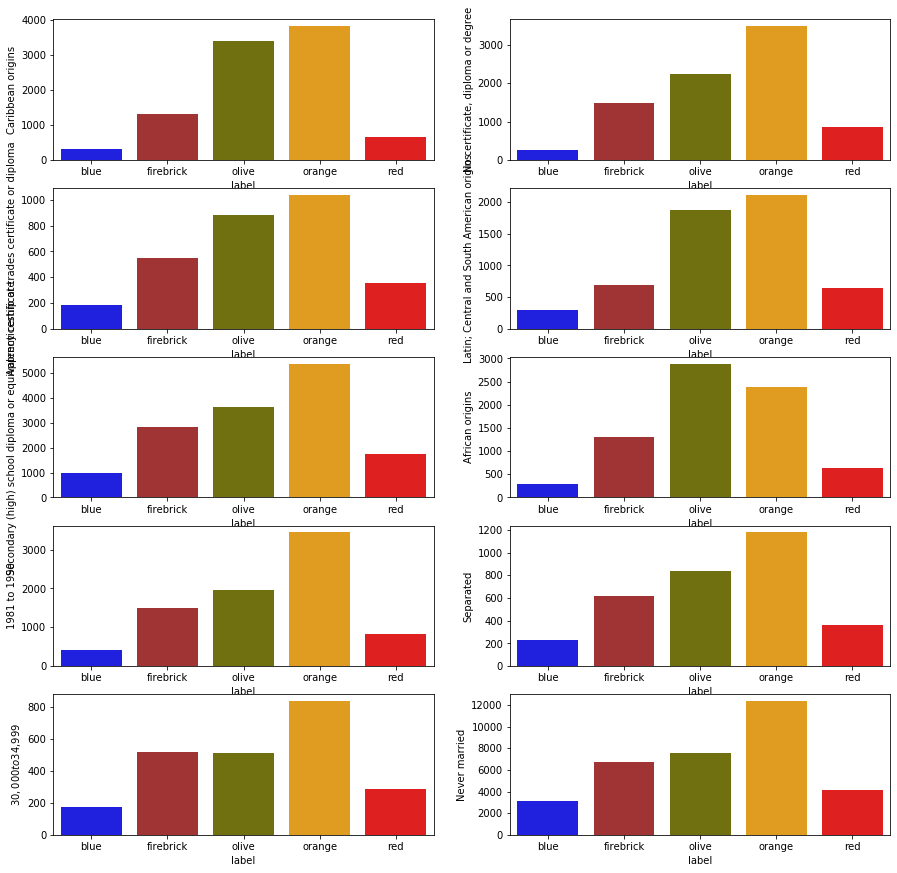

In [122]:
n_plots=len(cluster_df.columns)
rows=int((n_plots+(n_plots%2))/2)
fig,ax=plt.subplots(rows,2,figsize=(15,15))
i=0

for m in range(len(cluster_df.columns)):
    j=int(m%2)
    i=int(m/2)
    sns.barplot(y=cluster_df.iloc[:,m],x=cluster_df.index,palette=cluster_df.index,ax=ax[i,j])


plt.show()

In [123]:
subset_label.groupby('label')['label'].count()

label
blue         34
firebrick    34
olive        10
orange        9
red          53
Name: label, dtype: int64

In [124]:
caribbean_df.head()

,count,geometry,label
Agincourt North,10,POINT (-79.266712166 43.8054405769),orange
Agincourt South-Malvern West,11,POINT (-79.2656117966 43.78865755109999),orange
Alderwood,1,POINT (-79.5416109273 43.6049368959),blue
Annex,6,POINT (-79.4040006243 43.6715854351),orange
Banbury-Don Mills,3,POINT (-79.34971798079999 43.7376570043),orange


In [125]:
caribbean_df['label']=subset_label['label']

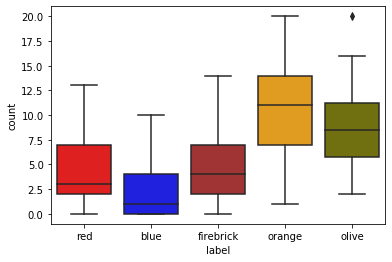

In [126]:
ax = sns.boxplot(x="label", y="count", order=rand_colors, data=caribbean_df,palette=rand_colors)